[The numerical solutions for the energy-dissipative and mass-conservative Allen–Cahn equation](https://www.sciencedirect.com/science/article/abs/pii/S0898122120301474?casa_token=UegUxB5gMc0AAAAA:xxoVQlcKtcJMDI_g5HZUcBsX9zekD_lpIOpFNEjJqbcH7OUOPNpPt_4GLdaYpxDw4h60-QkjdkE)

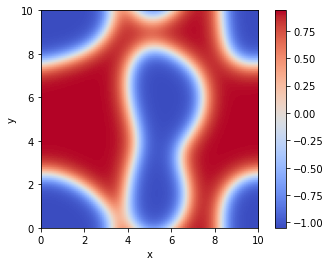

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the parameters
nx = 100   # number of grid points in x-direction
ny = 100   # number of grid points in y-direction
L = 10     # length of the domain in each direction
dx = L / (nx - 1)   # grid spacing in x-direction
dy = L / (ny - 1)   # grid spacing in y-direction
x = np.linspace(0, L, nx)   # x-coordinates of the grid points
y = np.linspace(0, L, ny)   # y-coordinates of the grid points
xx, yy = np.meshgrid(x, y)  # create a meshgrid

epsilon = 0.1   # small positive constant
dt = 0.001      # time step
timesteps = 10000   # number of time steps

# Initialize the function u with random noise
u = np.random.rand(nx, ny)

# Define the double-well potential function
def f(u):
    return u - u**3

# Define the Laplacian function using a finite difference scheme
def laplacian(u):
    ux = (np.roll(u, -1, axis=0) - 2*u + np.roll(u, 1, axis=0)) / dx**2
    uy = (np.roll(u, -1, axis=1) - 2*u + np.roll(u, 1, axis=1)) / dy**2
    return ux + uy

# Solve the Allen-Cahn equation using a semi-implicit scheme
for n in range(timesteps):
    lapu = laplacian(u)
    u += dt * (epsilon * lapu + f(u))
    u -= dt * np.mean(u)

# Plot the final solution
fig, ax = plt.subplots()
im = ax.imshow(u, cmap='coolwarm', extent=[0, L, 0, L])
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im)
plt.show()
